In [1]:
import sys
from datetime import timedelta, datetime
import pandas as pd
import pandas.io.sql as psql
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import math

import scipy.stats as stats
import urllib
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 49)
pd.set_option('display.width', None)

In [3]:
# DB 연결
CONNECTION = "postgres://guest_user:######@#.#.#.#:####/ESS_Operating_Site1"
with psycopg2.connect(CONNECTION) as conn:
    cursor = conn.cursor()

In [4]:
# Set Timezone
query = "SET TIME ZONE 'Asia/Seoul';"
cursor.execute(query)

In [5]:
#시작시간
s_time = '2021-10-01 00:00:00'

#종료시간
e_time = '2022-01-01 00:00:00'

In [6]:
# 기본 쿼리
query = """
SELECT date_trunc('day', r."TIMESTAMP") as "DAY",
	"RACK_ID",
	MAX("RACK_CELL_VOLTAGE_GAP") as MAX_RACK_CELL_VOLTAGE_GAP
FROM rack r 
WHERE r."TIMESTAMP" >= '{stime}'
    and r."TIMESTAMP" < '{etime}'
group by "DAY", "RACK_ID";
""".format(stime= s_time, etime=e_time)

In [7]:
df_rack = psql.read_sql(query, conn)
dict_rack = df_rack.to_dict()
cursor.close()

In [8]:
df_rack

,DAY,RACK_ID,max_rack_cell_voltage_gap
0,2021-09-30 15:00:00+00:00,1,0.106
1,2021-09-30 15:00:00+00:00,2,0.067
2,2021-09-30 15:00:00+00:00,3,0.058
3,2021-09-30 15:00:00+00:00,4,0.054
4,2021-09-30 15:00:00+00:00,5,0.043
5,2021-09-30 15:00:00+00:00,6,0.051
6,2021-09-30 15:00:00+00:00,7,0.055
7,2021-09-30 15:00:00+00:00,8,0.046
8,2021-10-01 15:00:00+00:00,1,0.106
9,2021-10-01 15:00:00+00:00,2,0.064


In [57]:
df_rack_1 = df_rack[df_rack['RACK_ID']==1]

In [58]:
df_rack_1 = df_rack_1.reset_index(drop=True)

In [68]:
df_rack_1 = df_rack_1.reset_index()

In [10]:
df_rack_2 = df_rack[df_rack['RACK_ID']==2]

In [60]:
df_rack_2 = df_rack_2.reset_index(drop=True)

In [80]:
df_rack_2 = df_rack_2.reset_index()

In [11]:
df_rack_3 = df_rack[df_rack['RACK_ID']==3]

In [61]:
df_rack_3 = df_rack_3.reset_index(drop=True)

In [81]:
df_rack_3 = df_rack_3.reset_index()

In [12]:
df_rack_4 = df_rack[df_rack['RACK_ID']==4]

In [62]:
df_rack_4 = df_rack_4.reset_index(drop=True)

In [82]:
df_rack_4 = df_rack_4.reset_index()

In [13]:
df_rack_5 = df_rack[df_rack['RACK_ID']==5]

In [63]:
df_rack_5 = df_rack_5.reset_index(drop=True)

In [83]:
df_rack_5 = df_rack_5.reset_index()

In [14]:
df_rack_6 = df_rack[df_rack['RACK_ID']==6]

In [64]:
df_rack_6 = df_rack_6.reset_index(drop=True)

In [84]:
df_rack_6 = df_rack_6.reset_index()

In [15]:
df_rack_7 = df_rack[df_rack['RACK_ID']==7]

In [65]:
df_rack_7 = df_rack_7.reset_index(drop=True)

In [85]:
df_rack_7 = df_rack_7.reset_index()

In [16]:
df_rack_8 = df_rack[df_rack['RACK_ID']==8]

In [66]:
df_rack_8 = df_rack_8.reset_index(drop=True)

In [86]:
df_rack_8 = df_rack_8.reset_index()

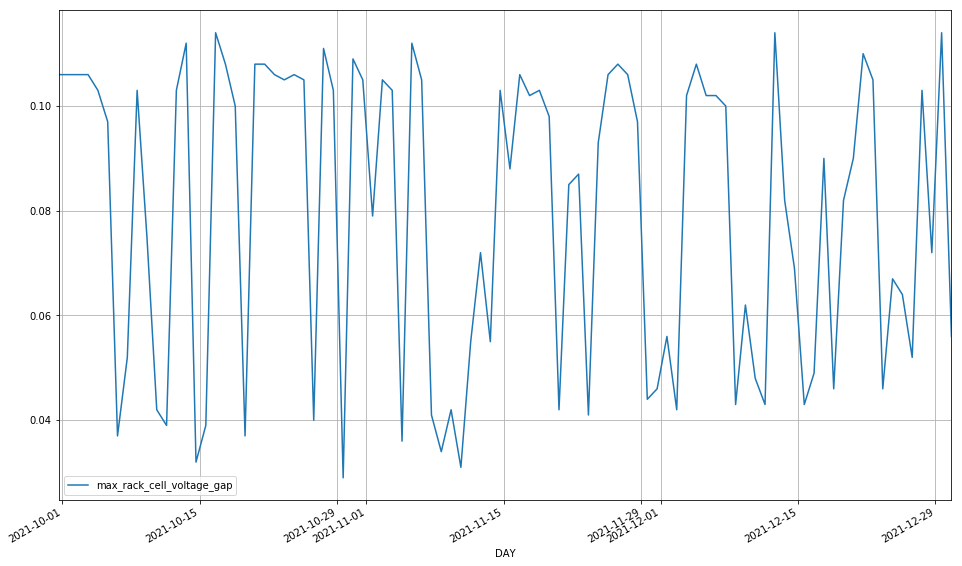

In [44]:
df_rack_1.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

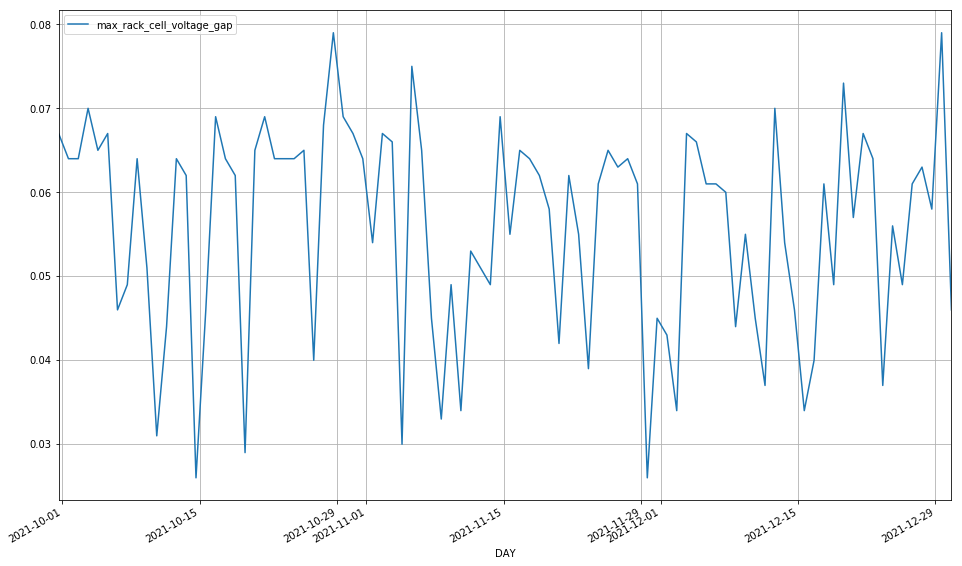

In [45]:
df_rack_2.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

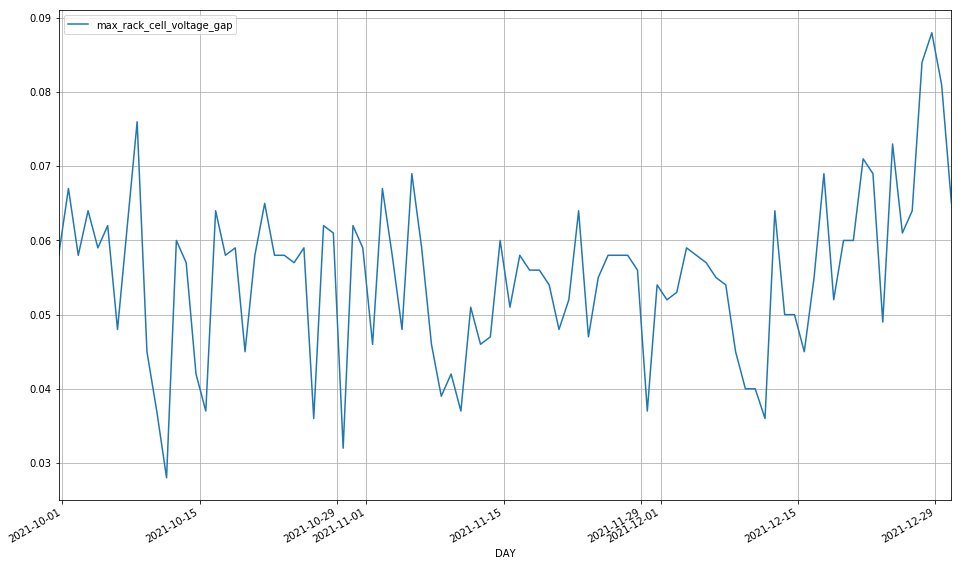

In [46]:
df_rack_3.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

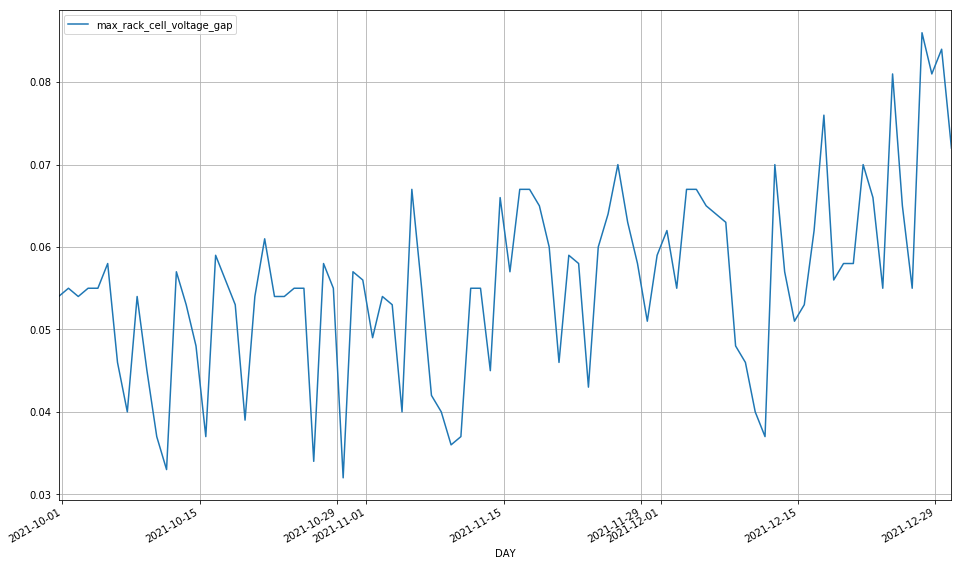

In [47]:
df_rack_4.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

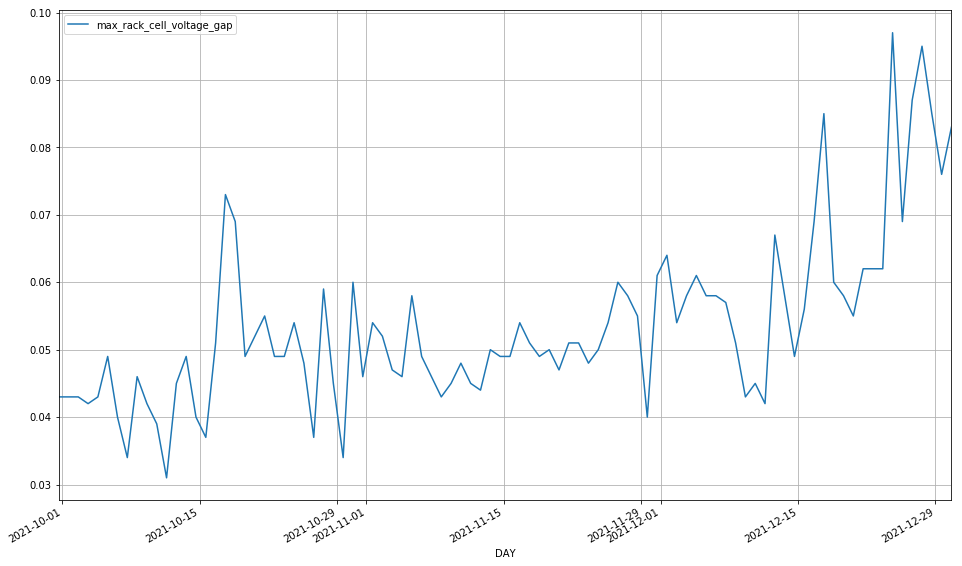

In [48]:
df_rack_5.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

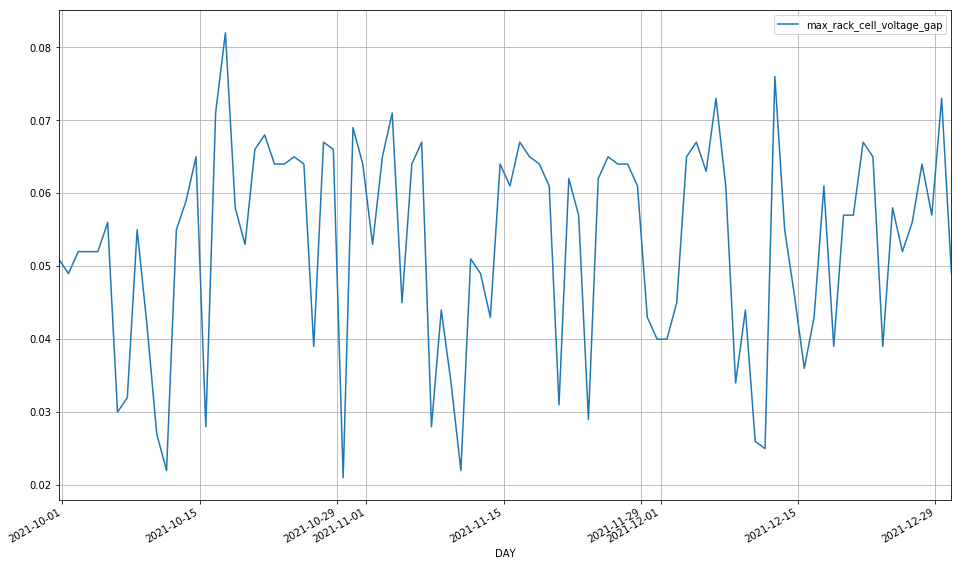

In [49]:
df_rack_6.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

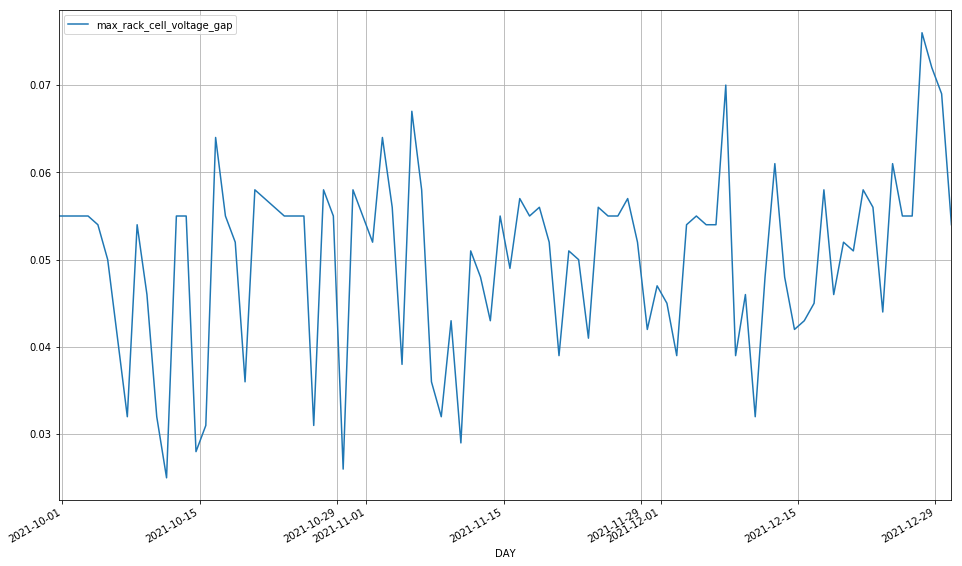

In [50]:
df_rack_7.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

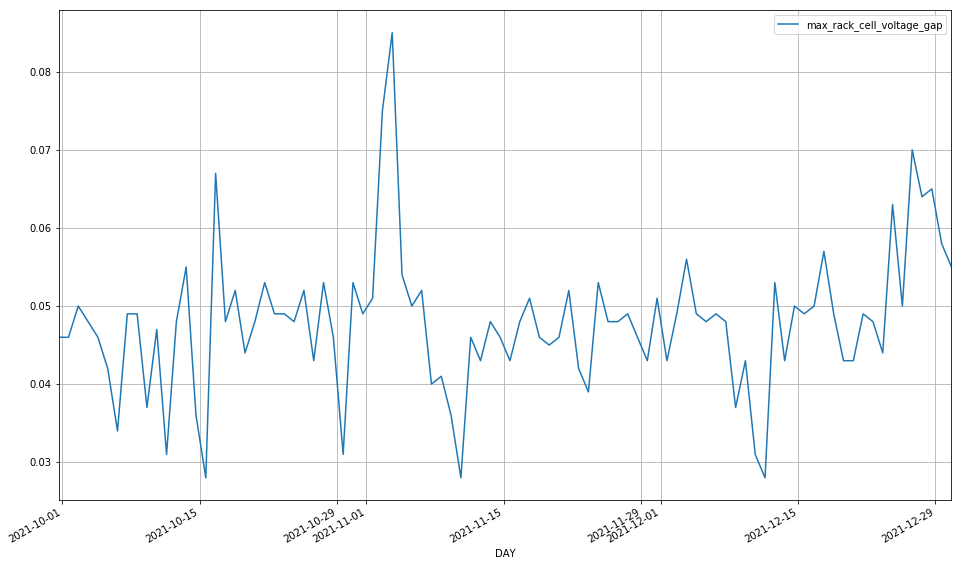

In [51]:
df_rack_8.plot(x='DAY', y='max_rack_cell_voltage_gap', figsize=(16,10), grid=True)
plt.show()

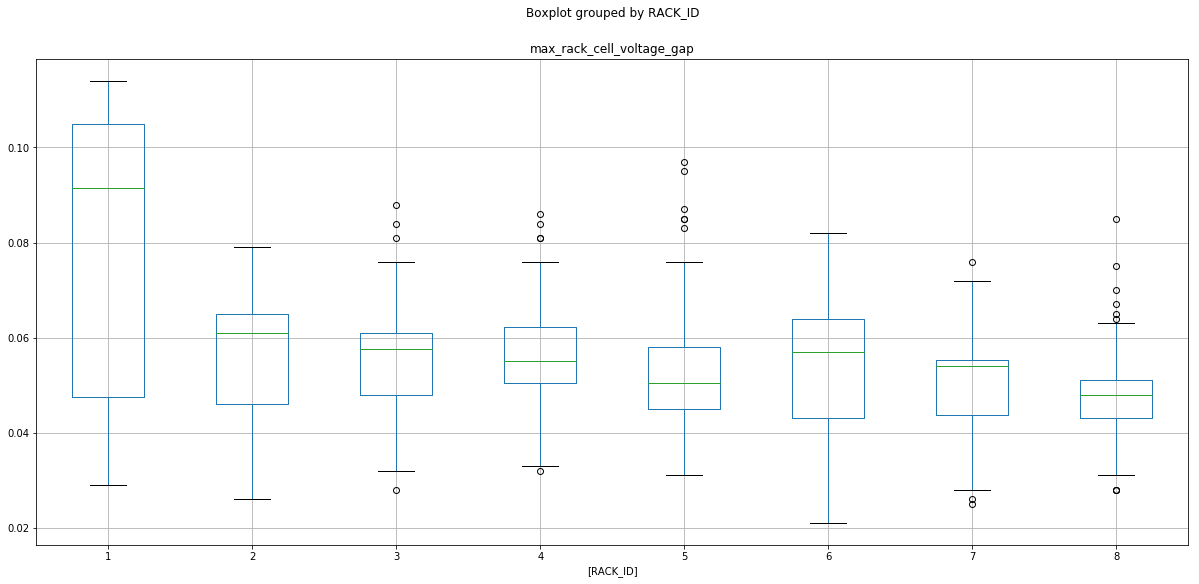

In [54]:
df_rack[['max_rack_cell_voltage_gap', 'RACK_ID']].boxplot(by='RACK_ID', figsize=(20,9))

### 선형 회귀 모델로 증가추세 확인하기

##### 기울기, 절편 구하기

In [67]:
import statsmodels.api as sm

In [78]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.017
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     1.552
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):              0.216
Time:                               17:31:46   Log-Likelihood:                 197.38
No. Observations:                         92   AIC:                            -390.8
Df Residuals:                             90   BIC:                            -385.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0861      0.006     14.548      0.000       0.074       0.098
index         -0.0001      0.000     -1.246      0.216      -0.000    8.33e-05
==============================================================================
Omnibus:                       60.146   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.383
Skew:                          -0.483   Prob(JB):                      0.00556
Kurtosis:                       1.668   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.010
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.8772
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):              0.351
Time:                               17:32:53   Log-Likelihood:                 272.39
No. Observations:                         92   AIC:                            -540.8
Df Residuals:                             90   BIC:                            -535.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0581      0.003     22.159      0.000       0.053       0.063
index      -4.658e-05   4.97e-05     -0.937      0.351      -0.000    5.22e-05
==============================================================================
Omnibus:                        7.041   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.362
Skew:                          -0.675   Prob(JB):                       0.0252
Kurtosis:                       2.684   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_3).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.038
Model:                                   OLS   Adj. R-squared:                  0.027
Method:                        Least Squares   F-statistic:                     3.570
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):             0.0620
Time:                               17:33:13   Log-Likelihood:                 286.39
No. Observations:                         92   AIC:                            -568.8
Df Residuals:                             90   BIC:                            -563.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0516      0.002     22.950      0.000       0.047       0.056
index       8.071e-05   4.27e-05      1.890      0.062   -4.15e-06       0.000
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.008
Skew:                           0.021   Prob(JB):                        0.996
Kurtosis:                       2.985   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.249
Model:                                   OLS   Adj. R-squared:                  0.240
Method:                        Least Squares   F-statistic:                     29.80
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):           4.20e-07
Time:                               17:33:13   Log-Likelihood:                 295.69
No. Observations:                         92   AIC:                            -587.4
Df Residuals:                             90   BIC:                            -582.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0461      0.002     22.671      0.000       0.042       0.050
index          0.0002   3.86e-05      5.459      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.172
Skew:                          -0.403   Prob(JB):                        0.205
Kurtosis:                       2.579   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_5).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.416
Model:                                   OLS   Adj. R-squared:                  0.410
Method:                        Least Squares   F-statistic:                     64.20
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):           3.84e-12
Time:                               17:33:14   Log-Likelihood:                 295.73
No. Observations:                         92   AIC:                            -587.5
Df Residuals:                             90   BIC:                            -582.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0395      0.002     19.417      0.000       0.035       0.044
index          0.0003   3.86e-05      8.013      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.085   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.098
Skew:                           0.995   Prob(JB):                     3.55e-06
Kurtosis:                       4.610   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_6).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                 -0.008
Method:                        Least Squares   F-statistic:                    0.2786
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):              0.599
Time:                               17:33:14   Log-Likelihood:                 260.49
No. Observations:                         92   AIC:                            -517.0
Df Residuals:                             90   BIC:                            -511.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0519      0.003     17.395      0.000       0.046       0.058
index       2.988e-05   5.66e-05      0.528      0.599   -8.26e-05       0.000
==============================================================================
Omnibus:                        7.174   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.511
Skew:                          -0.577   Prob(JB):                       0.0386
Kurtosis:                       2.394   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_7).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.047
Model:                                   OLS   Adj. R-squared:                  0.036
Method:                        Least Squares   F-statistic:                     4.443
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):             0.0378
Time:                               17:33:15   Log-Likelihood:                 292.53
No. Observations:                         92   AIC:                            -581.1
Df Residuals:                             90   BIC:                            -576.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0464      0.002     22.021      0.000       0.042       0.051
index       8.422e-05      4e-05      2.108      0.038    4.85e-06       0.000
==============================================================================
Omnibus:                        3.144   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.047
Skew:                          -0.390   Prob(JB):                        0.218
Kurtosis:                       2.568   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", df_rack_8).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.030
Model:                                   OLS   Adj. R-squared:                  0.020
Method:                        Least Squares   F-statistic:                     2.820
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):             0.0966
Time:                               17:33:15   Log-Likelihood:                 302.73
No. Observations:                         92   AIC:                            -601.5
Df Residuals:                             90   BIC:                            -596.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0452      0.002     23.971      0.000       0.041       0.049
index       6.005e-05   3.58e-05      1.679      0.097    -1.1e-05       0.000
==============================================================================
Omnibus:                       22.999   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.420
Skew:                           0.838   Prob(JB):                     5.60e-13
Kurtosis:                       6.451   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### rack 4번 5번은 다시 해보자

In [96]:
partial_df_rack_4 = df_rack_4[50:-1]

In [95]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", partial_df_rack_4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.157
Model:                                   OLS   Adj. R-squared:                  0.135
Method:                        Least Squares   F-statistic:                     7.243
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):             0.0104
Time:                               17:35:47   Log-Likelihood:                 130.08
No. Observations:                         41   AIC:                            -256.2
Df Residuals:                             39   BIC:                            -252.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0349      0.010      3.580      0.001       0.015       0.055
index          0.0004      0.000      2.691      0.010    9.17e-05       0.001
==============================================================================
Omnibus:                        1.154   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                1.169
Skew:                          -0.321   Prob(JB):                        0.558
Kurtosis:                       2.479   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
partial_df_rack_5 = df_rack_5[50:-1]

In [98]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index", partial_df_rack_5).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.425
Model:                                   OLS   Adj. R-squared:                  0.410
Method:                        Least Squares   F-statistic:                     28.83
Date:                       Mon, 03 Jan 2022   Prob (F-statistic):           3.88e-06
Time:                               17:36:40   Log-Likelihood:                 130.00
No. Observations:                         41   AIC:                            -256.0
Df Residuals:                             39   BIC:                            -252.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.010      0.875      0.387      -0.011       0.028
index          0.0007      0.000      5.370      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.566
Skew:                           0.288   Prob(JB):                        0.753
Kurtosis:                       2.986   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
partial_df_rack_5

,index,DAY,RACK_ID,max_rack_cell_voltage_gap
50,50,2021-11-19 15:00:00+00:00,5,0.050
51,51,2021-11-20 15:00:00+00:00,5,0.047
52,52,2021-11-21 15:00:00+00:00,5,0.051
53,53,2021-11-22 15:00:00+00:00,5,0.051
54,54,2021-11-23 15:00:00+00:00,5,0.048
55,55,2021-11-24 15:00:00+00:00,5,0.050
56,56,2021-11-25 15:00:00+00:00,5,0.054
57,57,2021-11-26 15:00:00+00:00,5,0.060
58,58,2021-11-27 15:00:00+00:00,5,0.058
59,59,2021-11-28 15:00:00+00:00,5,0.055


In [99]:
import seaborn as sns

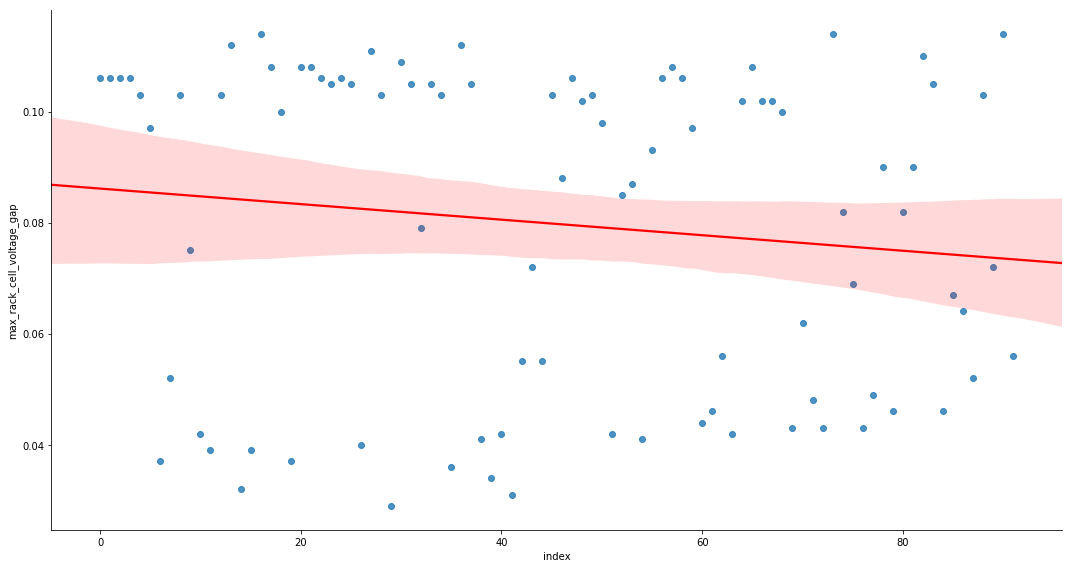

In [119]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_1, line_kws={'color':"red"},height=8, aspect=15/8)

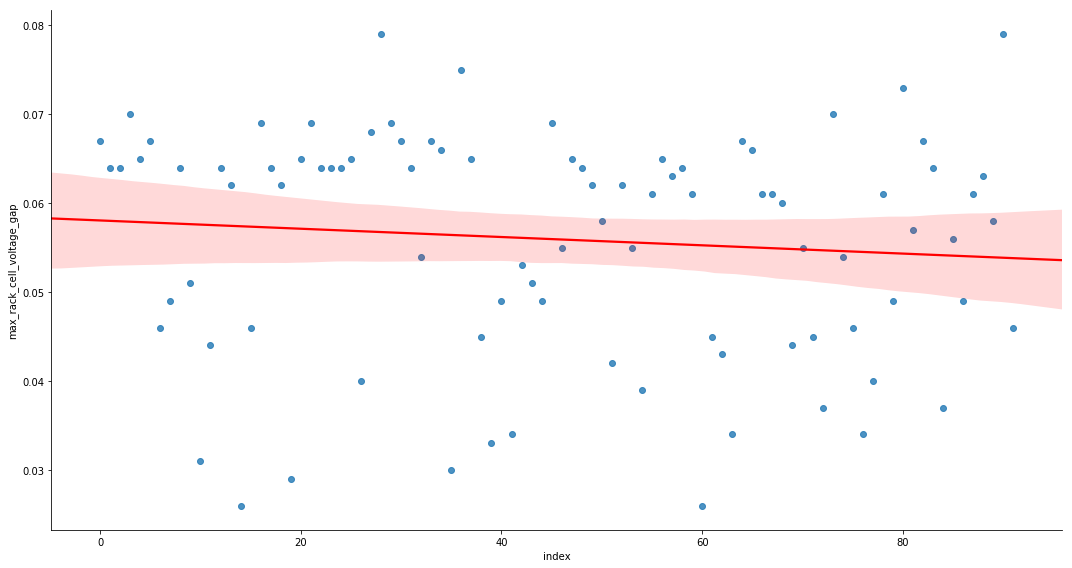

In [120]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_2, line_kws={'color':"red"},height=8, aspect=15/8)

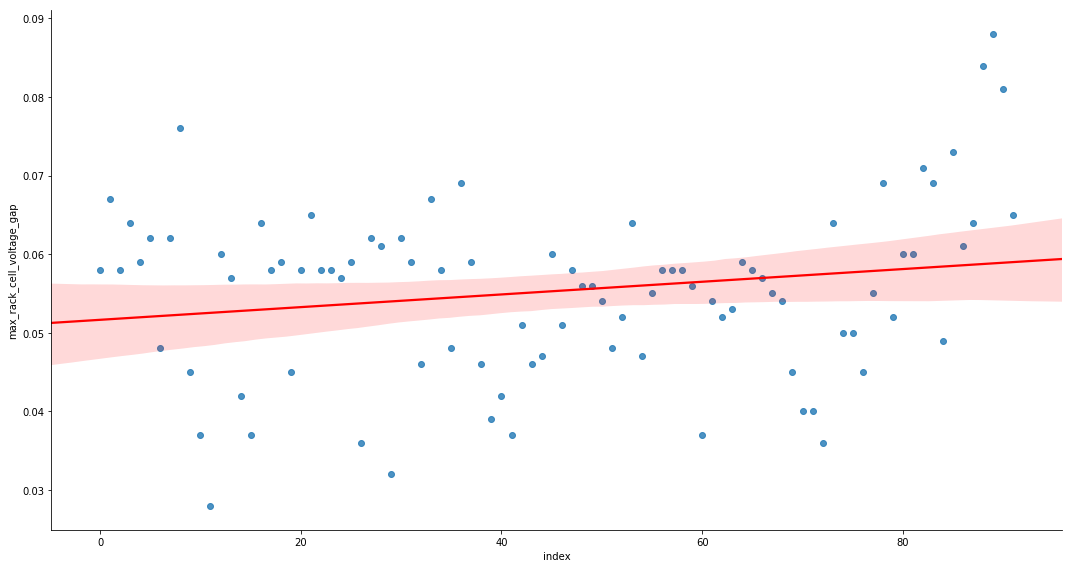

In [121]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_3, line_kws={'color':"red"},height=8, aspect=15/8)

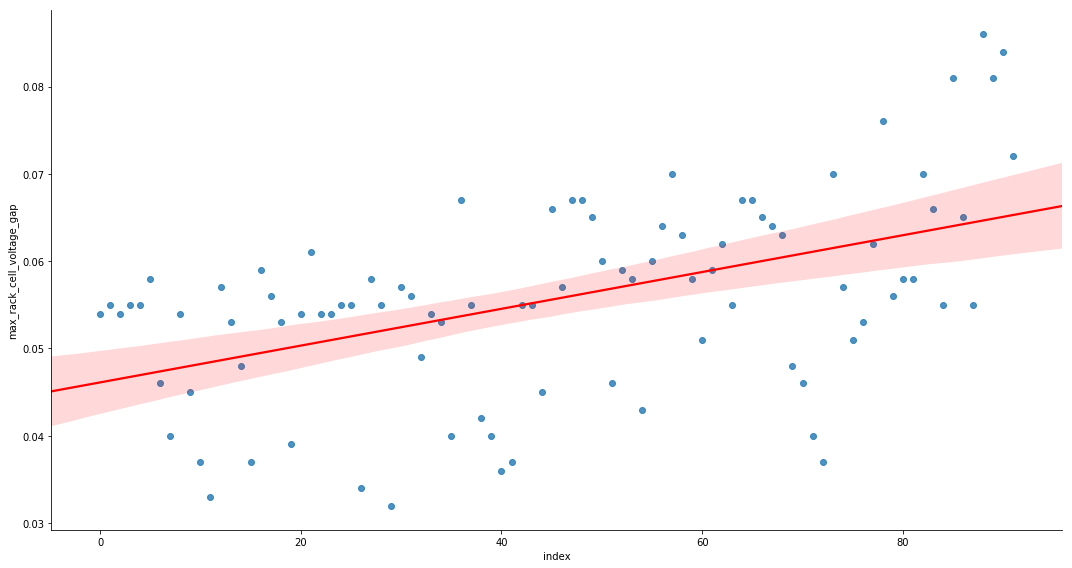

In [122]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_4, line_kws={'color':"red"},height=8, aspect=15/8)

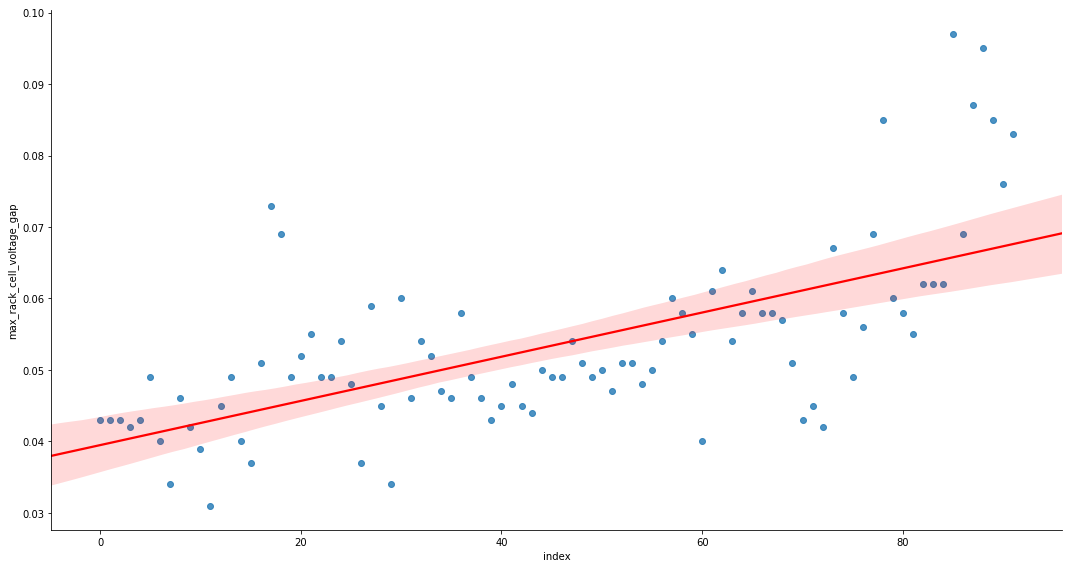

In [123]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_5, line_kws={'color':"red"},height=8, aspect=15/8)

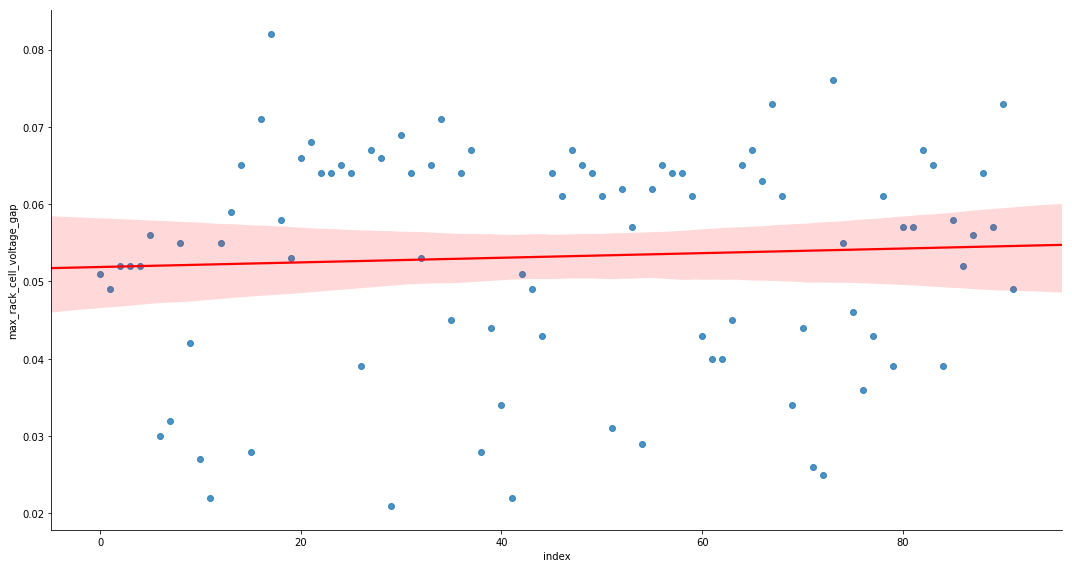

In [124]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_6, line_kws={'color':"red"},height=8, aspect=15/8)

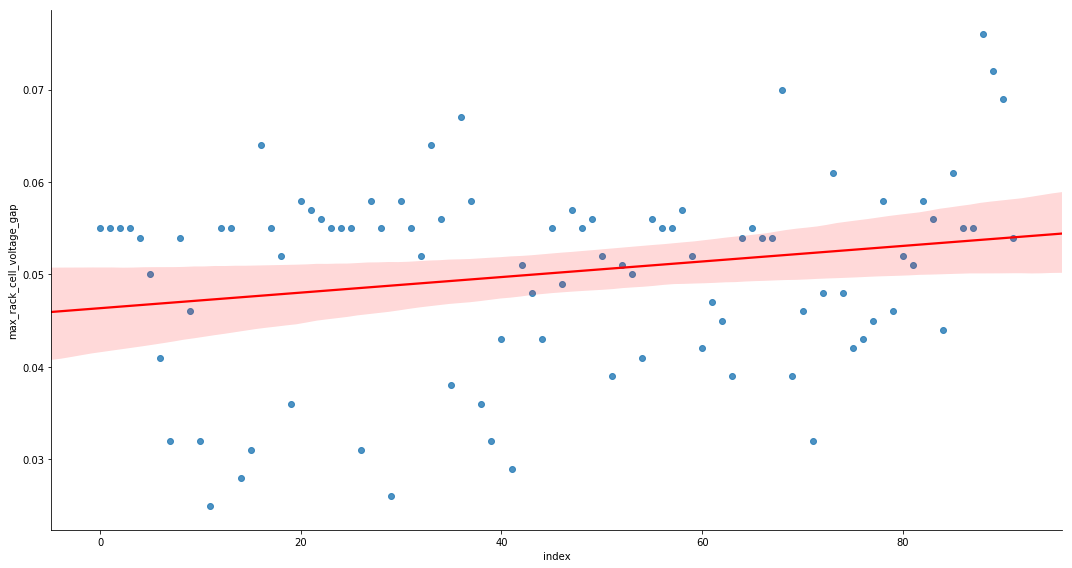

In [125]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_7, line_kws={'color':"red"},height=8, aspect=15/8)

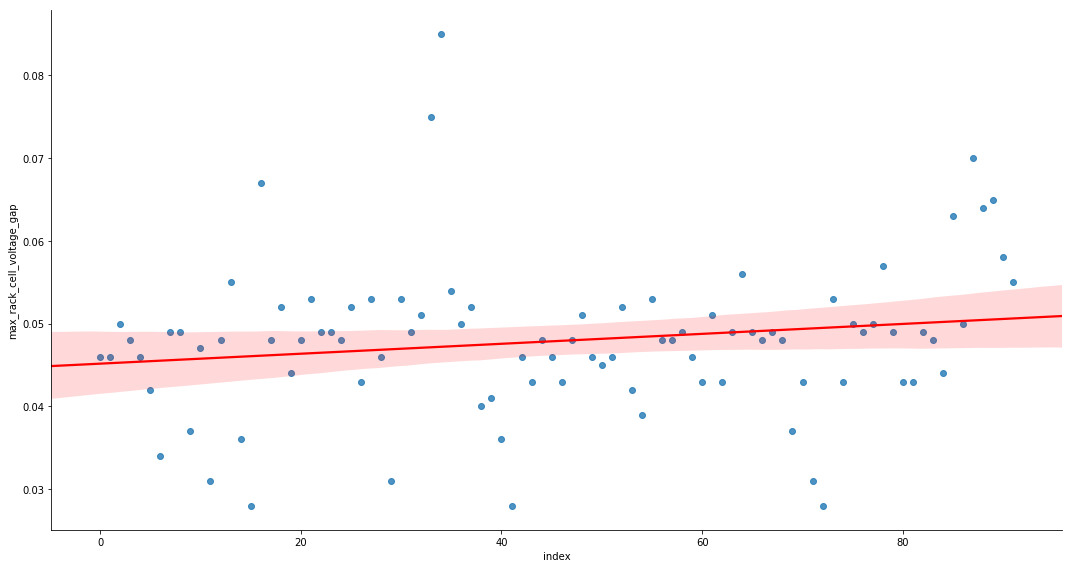

In [126]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_8, line_kws={'color':"red"},height=8, aspect=15/8)

#### 최근 데이터를 이용한 트렌드 확인

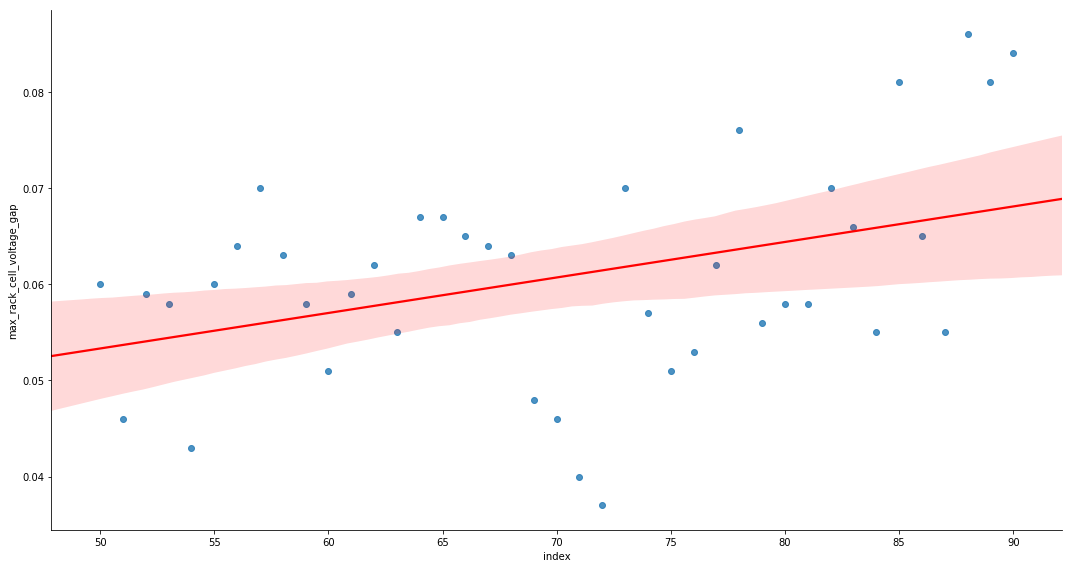

In [129]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=partial_df_rack_4, line_kws={'color':"red"},height=8, aspect=15/8)

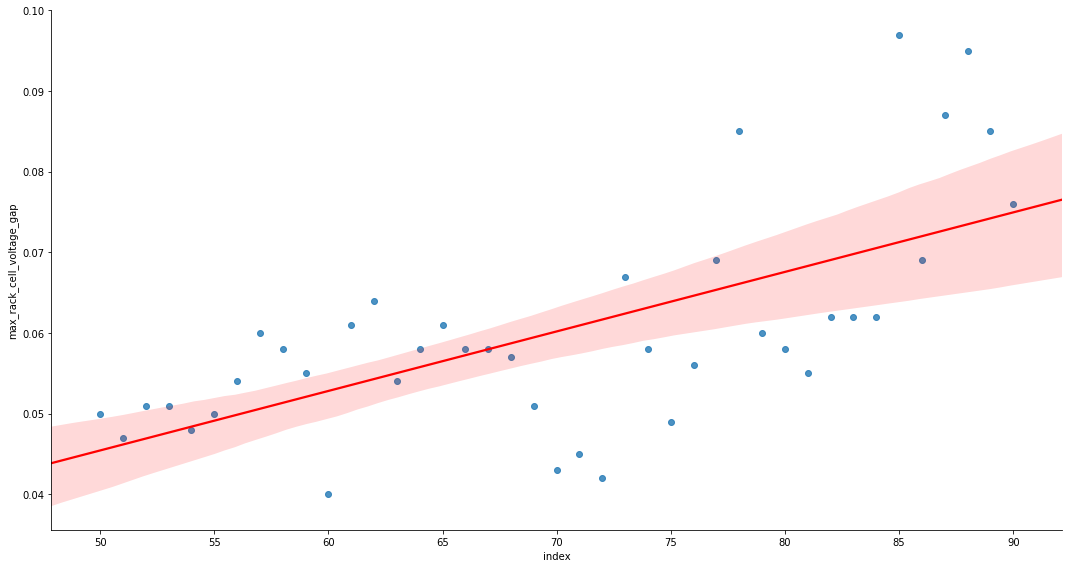

In [132]:
sns.lmplot(x="index", y="max_rack_cell_voltage_gap", data=partial_df_rack_5, line_kws={'color':"red"},height=8, aspect=15/8)

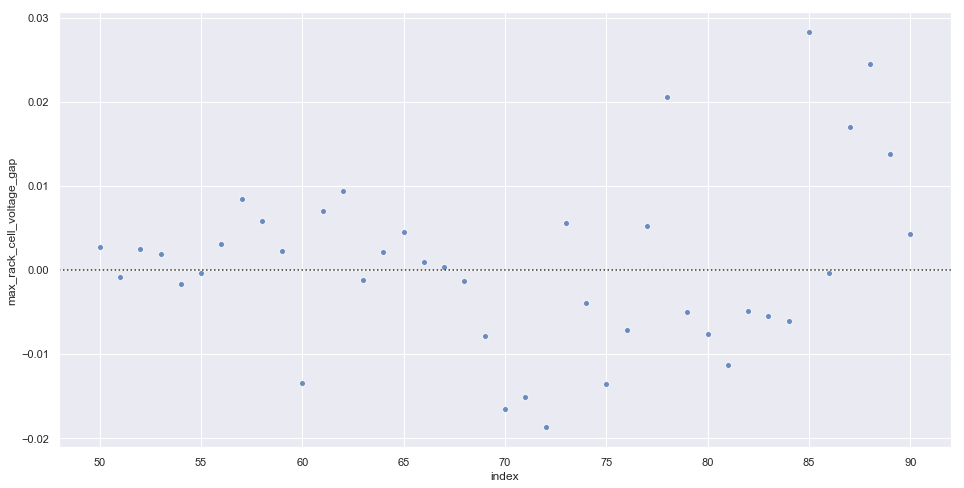

In [141]:
sns.set(rc={"figure.figsize":(16,8)})
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=partial_df_rack_5, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

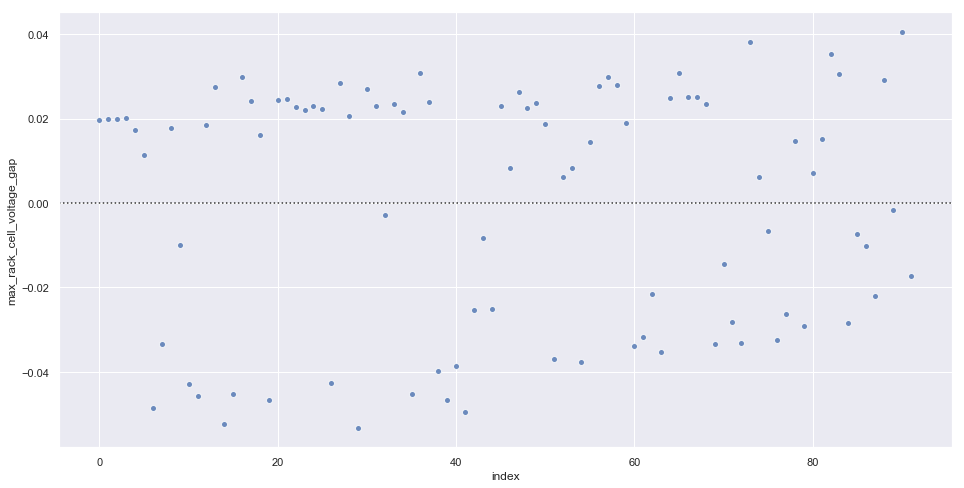

In [140]:
sns.set(rc={"figure.figsize":(16,8)})
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_1, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

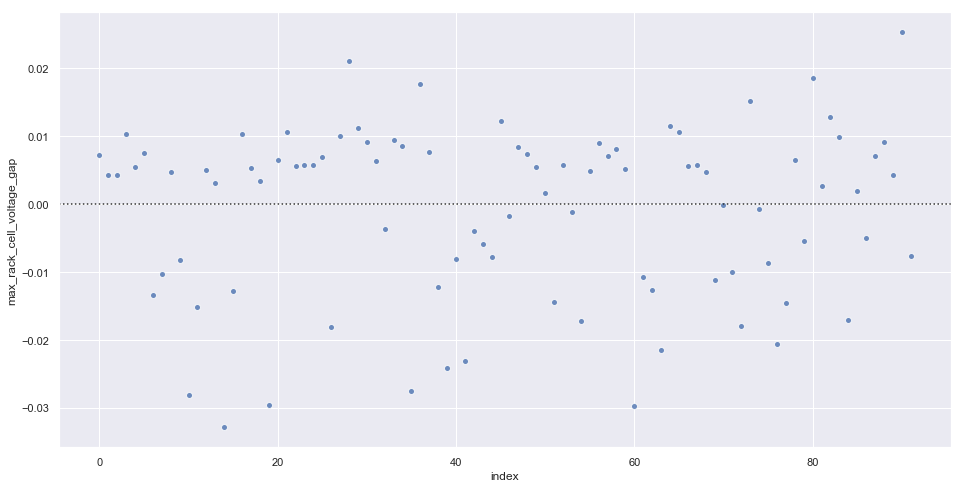

In [142]:
sns.set(rc={"figure.figsize":(16,8)})
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_2, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

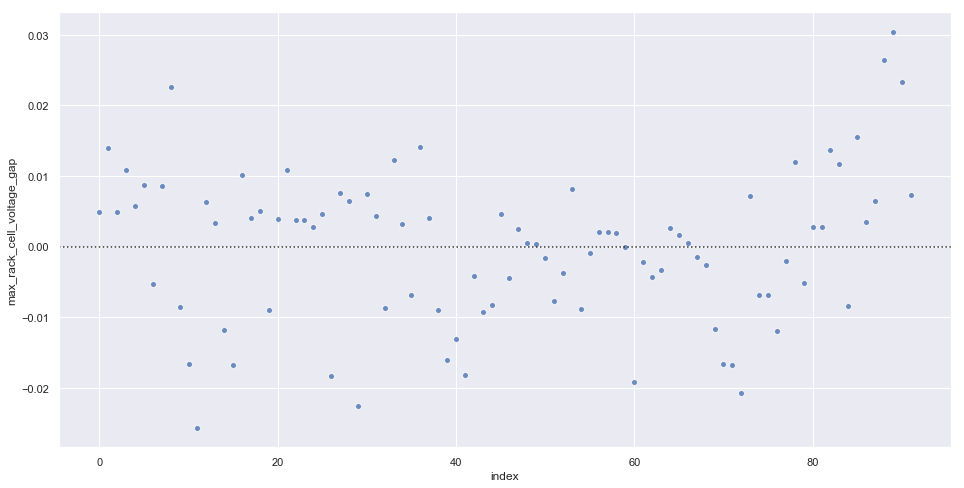

In [143]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_3, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

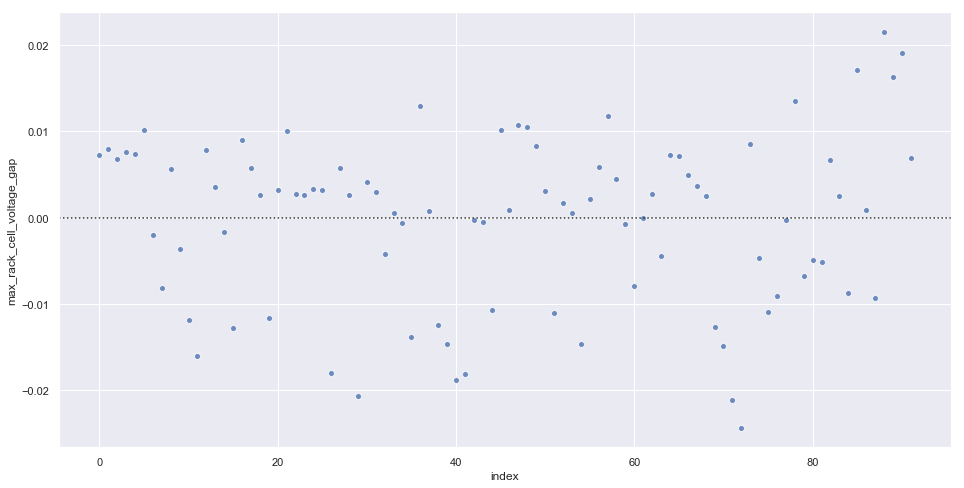

In [144]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_4, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

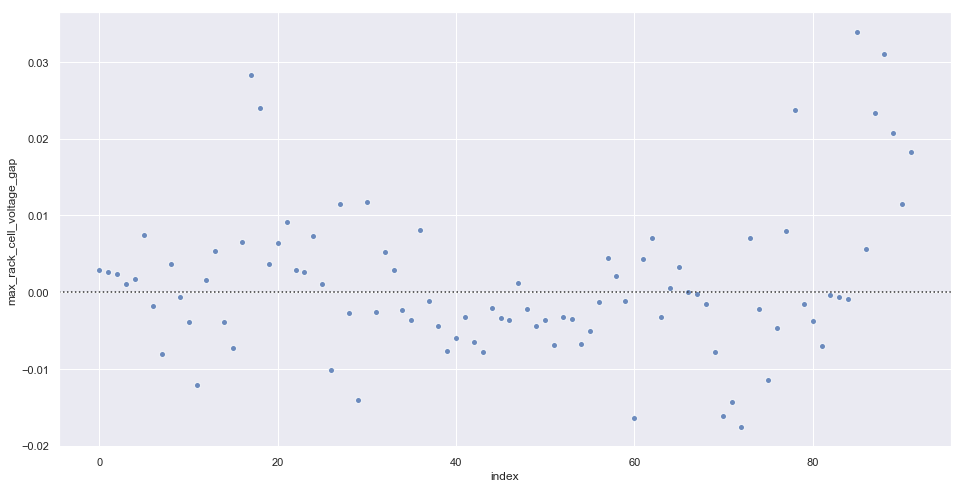

In [145]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_5, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

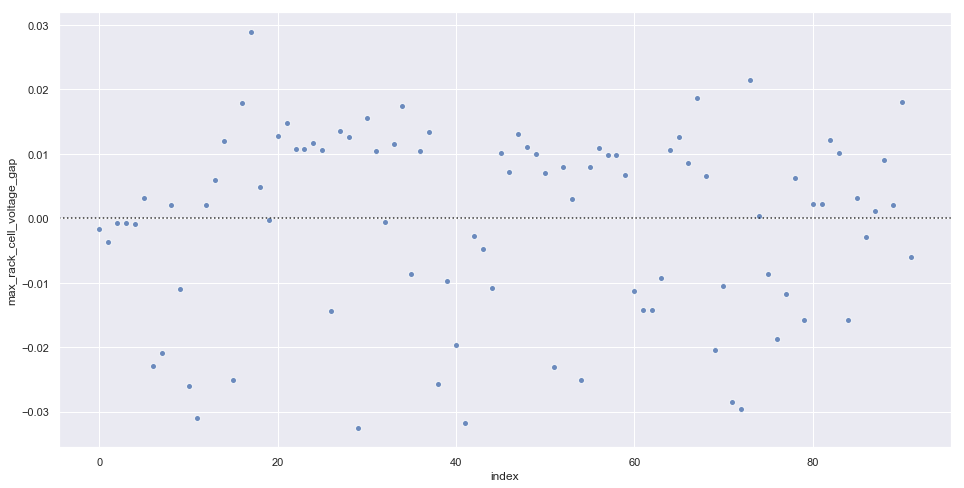

In [146]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_6, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

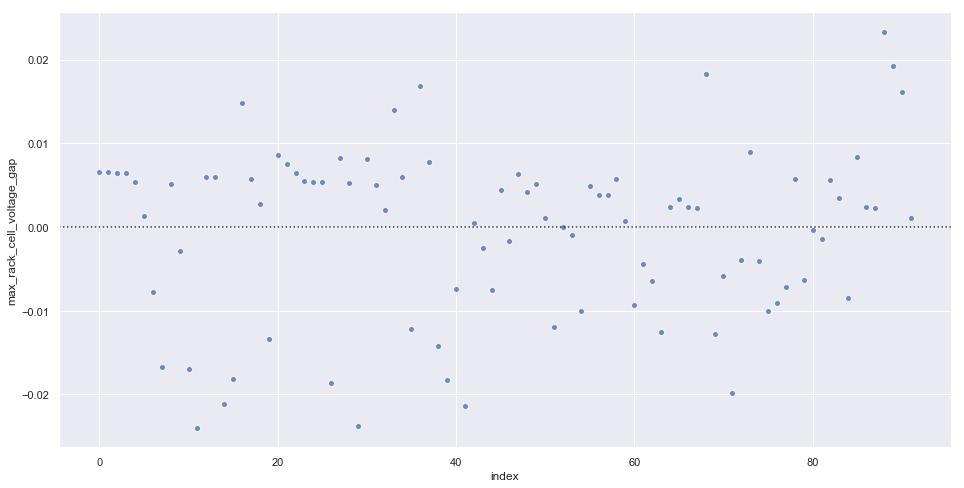

In [147]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_7, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

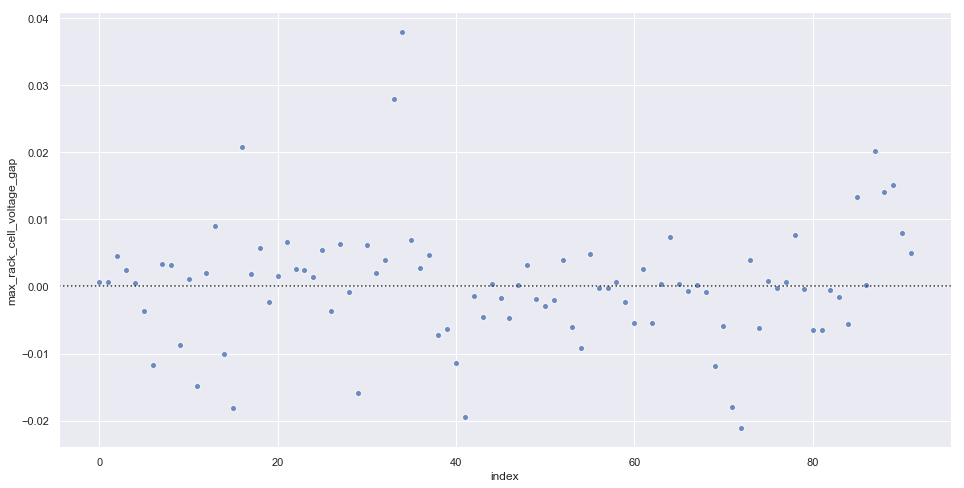

In [148]:
sns.residplot(x="index", y="max_rack_cell_voltage_gap", data=df_rack_8, robust=True, line_kws={'color':"red"}, scatter_kws={'edgecolor':'white'})

In [152]:
weather_df = pd.read_csv('OBS_ASOS_TIM_20220106140348.csv', encoding='cp949')

In [168]:
type(weather_df)

pandas.core.frame.DataFrame

In [169]:
weather_df.head(5)

,지점,지점명,일시,기온(°C),기온 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,259,강진군,2021-10-01 0:00,19.9,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,21.7,NaN,23.2,23.8,24.5,24.6
1,259,강진군,2021-10-01 1:00,20.0,NaN,NaN,9.0,NaN,9.0,6.0,4.0,NaN,NaN,21.9,NaN,23.1,23.6,24.4,24.6
2,259,강진군,2021-10-01 2:00,20.2,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,22.0,NaN,23.0,23.6,24.3,24.5
3,259,강진군,2021-10-01 3:00,19.9,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,22.0,NaN,23.0,23.5,24.2,24.5
4,259,강진군,2021-10-01 4:00,19.6,NaN,NaN,9.0,NaN,9.0,9.0,4.0,NaN,NaN,21.8,NaN,22.9,23.5,24.1,24.4


In [172]:
weather_df['일시'][0]

str

In [163]:
weather_df.describe()

,지점,기온(°C),기온 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,2209.0,2209.000000,0.0,1064.000000,1145.0,1064.000000,1146.0,2200.000000,2205.000000,0.0,791.00000,2204.000000,5.0,2209.000000,2209.000000,2209.000000,2209.000000
mean,259.0,10.227116,NaN,0.486748,9.0,0.961607,9.0,4.332273,2.024490,NaN,7.70670,10.955853,9.0,12.204980,12.816659,13.857311,14.581530
std,0.0,7.768852,NaN,0.423357,0.0,0.789130,0.0,3.794045,2.581404,NaN,9.85014,7.082311,0.0,6.473411,6.257286,5.788717,5.573162
min,259.0,-8.000000,NaN,0.000000,9.0,0.000000,9.0,0.000000,0.000000,NaN,1.00000,-0.500000,9.0,0.600000,2.100000,4.300000,5.500000
25%,259.0,4.700000,NaN,0.000000,9.0,0.250000,9.0,0.000000,0.000000,NaN,3.00000,5.800000,9.0,7.200000,8.000000,9.300000,10.100000
50%,259.0,9.300000,NaN,0.500000,9.0,0.830000,9.0,5.000000,1.000000,NaN,4.00000,9.400000,9.0,11.100000,11.900000,13.000000,13.700000
75%,259.0,16.100000,NaN,1.000000,9.0,1.552500,9.0,8.000000,4.000000,NaN,7.00000,14.825000,9.0,15.700000,16.100000,16.900000,17.600000
max,259.0,30.200000,NaN,1.000000,9.0,2.970000,9.0,10.000000,10.000000,NaN,49.00000,33.600000,9.0,28.300000,28.300000,25.600000,25.100000


### 일사량 사용하기

###### 일사량 값 없는애들 지우기
###### 10시~14시 평균으로 하루 일조량 구하기
###### 일사량 - 최대셀전압 상관관계 구하기
###### 일사량을 제외하여 최대 셀전압이 오르고있는지 파악하기

In [178]:
from datetime import datetime

In [188]:
date_list = []
for i in range(len(weather_df['일시'])):
    datetime_ = datetime.strptime(weather_df['일시'][i], '%Y-%m-%d %H:%M')
    if datetime_.hour > 9 and datetime_.hour < 15:
        date_list.append(datetime_.date())
    else:
        date_list.append('None')

In [190]:
weather_df['date'] = date_list

In [193]:
weather_df.head(12)

,지점,지점명,일시,기온(°C),기온 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),date
0,259,강진군,2021-10-01 0:00,19.9,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,21.7,NaN,23.2,23.8,24.5,24.6,None
1,259,강진군,2021-10-01 1:00,20.0,NaN,NaN,9.0,NaN,9.0,6.0,4.0,NaN,NaN,21.9,NaN,23.1,23.6,24.4,24.6,None
2,259,강진군,2021-10-01 2:00,20.2,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,22.0,NaN,23.0,23.6,24.3,24.5,None
3,259,강진군,2021-10-01 3:00,19.9,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,22.0,NaN,23.0,23.5,24.2,24.5,None
4,259,강진군,2021-10-01 4:00,19.6,NaN,NaN,9.0,NaN,9.0,9.0,4.0,NaN,NaN,21.8,NaN,22.9,23.5,24.1,24.4,None
5,259,강진군,2021-10-01 5:00,19.6,NaN,NaN,9.0,NaN,9.0,7.0,4.0,NaN,NaN,21.7,NaN,22.8,23.4,24.1,24.4,None
6,259,강진군,2021-10-01 6:00,19.1,NaN,NaN,9.0,NaN,9.0,6.0,4.0,NaN,NaN,21.6,NaN,22.7,23.3,24.0,24.4,None
7,259,강진군,2021-10-01 7:00,19.3,NaN,0.0,NaN,0.02,NaN,7.0,4.0,NaN,NaN,21.6,NaN,22.6,23.2,24.0,24.3,None
8,259,강진군,2021-10-01 8:00,19.7,NaN,0.0,NaN,0.20,NaN,0.0,0.0,NaN,NaN,22.0,NaN,22.6,23.2,23.9,24.3,None
9,259,강진군,2021-10-01 9:00,22.0,NaN,0.5,NaN,1.06,NaN,NaN,4.0,NaN,NaN,25.2,NaN,22.7,23.2,23.8,24.2,None


In [204]:
grouped_ = weather_df['일사(MJ/m2)'].groupby(weather_df['date']).mean()

In [252]:
weather_df_daytime = weather_df[weather_df['date'] != 'None']

In [254]:
weather_df_daytime['일사(MJ/m2)'].mean()

1.5507608695652175

In [222]:
grouped_list = []
for i in range(len(grouped_)-1):
    grouped_list.append(grouped_[i])
    print(grouped_[i])

2.384
2.4379999999999997
2.414
2.368
2.41
2.33
1.8579999999999999
1.8
2.154
1.6380000000000003
0.508
1.4100000000000001
1.932
1.3679999999999999
1.818
0.738
2.59
2.494
2.1740000000000004
1.4020000000000001
2.0620000000000003
2.3480000000000003
2.3840000000000003
1.786
2.252
2.274
1.92
2.3020000000000005
2.148
0.536
2.094
1.902
1.9659999999999997
1.9420000000000002
2.052
1.318
2.01
1.8059999999999998
0.40800000000000003
0.796
0.6439999999999999
1.0959999999999999
1.424
1.3980000000000001
1.6919999999999997
1.7
1.316
1.8619999999999997
1.7920000000000003
1.6179999999999999
1.6200000000000003
0.898
1.1680000000000001
1.018
0.394
1.474
1.8479999999999996
1.8679999999999999
1.8220000000000003
1.6800000000000002
0.20600000000000002
1.074
0.9219999999999999
1.004
1.568
1.654
1.7120000000000002
1.65
1.598
0.884
1.158
1.472
0.882
1.7399999999999998
1.192
0.9899999999999999
0.42400000000000004
0.9360000000000002
1.6580000000000001
1.022
1.308
1.412
1.654
1.656
1.038
1.144
1.7120000000000002
1.48

In [223]:
df_rack_1['solar'] = grouped_list

In [225]:
df_rack_2['solar'] = grouped_list

In [226]:
df_rack_3['solar'] = grouped_list

In [227]:
df_rack_4['solar'] = grouped_list

In [228]:
df_rack_5['solar'] = grouped_list

In [229]:
df_rack_6['solar'] = grouped_list

In [230]:
df_rack_7['solar'] = grouped_list

In [231]:
df_rack_8['solar'] = grouped_list

In [232]:
df_rack_1

,index,DAY,RACK_ID,max_rack_cell_voltage_gap,solar
0,0,2021-09-30 15:00:00+00:00,1,0.106,2.384
1,1,2021-10-01 15:00:00+00:00,1,0.106,2.438
2,2,2021-10-02 15:00:00+00:00,1,0.106,2.414
3,3,2021-10-03 15:00:00+00:00,1,0.106,2.368
4,4,2021-10-04 15:00:00+00:00,1,0.103,2.410
5,5,2021-10-05 15:00:00+00:00,1,0.097,2.330
6,6,2021-10-06 15:00:00+00:00,1,0.037,1.858
7,7,2021-10-07 15:00:00+00:00,1,0.052,1.800
8,8,2021-10-08 15:00:00+00:00,1,0.103,2.154
9,9,2021-10-09 15:00:00+00:00,1,0.075,1.638


In [235]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.576
Model:                                   OLS   Adj. R-squared:                  0.567
Method:                        Least Squares   F-statistic:                     60.49
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           2.57e-17
Time:                               17:25:44   Log-Likelihood:                 236.08
No. Observations:                         92   AIC:                            -466.2
Df Residuals:                             89   BIC:                            -458.6
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.009     -0.416      0.678      -0.022       0.014
index          0.0003   8.58e-05      3.810      0.000       0.000       0.000
solar          0.0443      0.004     10.836      0.000       0.036       0.052
==============================================================================
Omnibus:                        6.791   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.208
Skew:                          -0.599   Prob(JB):                       0.0449
Kurtosis:                       3.430   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.474
Model:                                   OLS   Adj. R-squared:                  0.462
Method:                        Least Squares   F-statistic:                     40.05
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           3.94e-13
Time:                               17:32:09   Log-Likelihood:                 301.47
No. Observations:                         92   AIC:                            -596.9
Df Residuals:                             89   BIC:                            -589.4
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0219      0.005      4.865      0.000       0.013       0.031
index          0.0001   4.22e-05      3.343      0.001    5.72e-05       0.000
solar          0.0178      0.002      8.858      0.000       0.014       0.022
==============================================================================
Omnibus:                        8.347   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               16.947
Skew:                          -0.131   Prob(JB):                     0.000209
Kurtosis:                       5.086   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_3).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.416
Model:                                   OLS   Adj. R-squared:                  0.402
Method:                        Least Squares   F-statistic:                     31.64
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           4.17e-11
Time:                               17:32:11   Log-Likelihood:                 309.30
No. Observations:                         92   AIC:                            -612.6
Df Residuals:                             89   BIC:                            -605.0
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0233      0.004      5.616      0.000       0.015       0.031
index          0.0002   3.87e-05      5.891      0.000       0.000       0.000
solar          0.0140      0.002      7.581      0.000       0.010       0.018
==============================================================================
Omnibus:                       18.497   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.150
Skew:                           0.758   Prob(JB):                     2.33e-08
Kurtosis:                       5.622   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.548
Model:                                   OLS   Adj. R-squared:                  0.538
Method:                        Least Squares   F-statistic:                     53.89
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           4.64e-16
Time:                               17:32:12   Log-Likelihood:                 319.03
No. Observations:                         92   AIC:                            -632.1
Df Residuals:                             89   BIC:                            -624.5
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0203      0.004      5.441      0.000       0.013       0.028
index          0.0003   3.48e-05      9.901      0.000       0.000       0.000
solar          0.0127      0.002      7.670      0.000       0.009       0.016
==============================================================================
Omnibus:                        6.109   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                8.719
Skew:                          -0.200   Prob(JB):                       0.0128
Kurtosis:                       4.454   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_5).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.528
Model:                                   OLS   Adj. R-squared:                  0.518
Method:                        Least Squares   F-statistic:                     49.81
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           3.05e-15
Time:                               17:32:12   Log-Likelihood:                 305.51
No. Observations:                         92   AIC:                            -605.0
Df Residuals:                             89   BIC:                            -597.5
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0216      0.004      4.995      0.000       0.013       0.030
index          0.0004   4.03e-05      9.970      0.000       0.000       0.000
solar          0.0088      0.002      4.592      0.000       0.005       0.013
==============================================================================
Omnibus:                       28.052   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.863
Skew:                           1.253   Prob(JB):                     4.04e-11
Kurtosis:                       5.491   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_6).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.555
Model:                                   OLS   Adj. R-squared:                  0.545
Method:                        Least Squares   F-statistic:                     55.57
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           2.18e-16
Time:                               17:32:13   Log-Likelihood:                 297.62
No. Observations:                         92   AIC:                            -589.2
Df Residuals:                             89   BIC:                            -581.7
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0072      0.005      1.524      0.131      -0.002       0.017
index          0.0003    4.4e-05      5.958      0.000       0.000       0.000
solar          0.0220      0.002     10.513      0.000       0.018       0.026
==============================================================================
Omnibus:                        7.694   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.212
Skew:                          -0.646   Prob(JB):                       0.0272
Kurtosis:                       3.461   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_7).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.485
Model:                                   OLS   Adj. R-squared:                  0.474
Method:                        Least Squares   F-statistic:                     41.97
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           1.45e-13
Time:                               17:32:13   Log-Likelihood:                 320.87
No. Observations:                         92   AIC:                            -635.7
Df Residuals:                             89   BIC:                            -628.2
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0176      0.004      4.820      0.000       0.010       0.025
index          0.0002   3.41e-05      6.838      0.000       0.000       0.000
solar          0.0142      0.002      8.706      0.000       0.011       0.017
==============================================================================
Omnibus:                        8.039   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               16.519
Skew:                          -0.050   Prob(JB):                     0.000259
Kurtosis:                       5.073   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", df_rack_8).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.232
Model:                                   OLS   Adj. R-squared:                  0.215
Method:                        Least Squares   F-statistic:                     13.48
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           7.71e-06
Time:                               17:32:14   Log-Likelihood:                 313.48
No. Observations:                         92   AIC:                            -621.0
Df Residuals:                             89   BIC:                            -613.4
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0278      0.004      7.036      0.000       0.020       0.036
index          0.0001    3.7e-05      4.054      0.000    7.65e-05       0.000
solar          0.0085      0.002      4.841      0.000       0.005       0.012
==============================================================================
Omnibus:                       31.237   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.375
Skew:                           1.181   Prob(JB):                     1.58e-17
Kurtosis:                       6.822   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
partial_df_rack_4 = df_rack_4[50:-1]

In [244]:
partial_df_rack_5 = df_rack_5[50:-1]

In [245]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", partial_df_rack_4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.320
Model:                                   OLS   Adj. R-squared:                  0.284
Method:                        Least Squares   F-statistic:                     8.924
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           0.000665
Time:                               17:41:37   Log-Likelihood:                 134.48
No. Observations:                         41   AIC:                            -263.0
Df Residuals:                             38   BIC:                            -257.8
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0214      0.010      2.162      0.037       0.001       0.042
index          0.0004      0.000      2.914      0.006       0.000       0.001
solar          0.0108      0.004      3.017      0.005       0.004       0.018
==============================================================================
Omnibus:                        1.558   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                0.674
Skew:                          -0.115   Prob(JB):                        0.714
Kurtosis:                       3.585   Cond. No.                         484.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
reg = sm.OLS.from_formula("max_rack_cell_voltage_gap ~ index+solar", partial_df_rack_5).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     max_rack_cell_voltage_gap   R-squared:                       0.453
Model:                                   OLS   Adj. R-squared:                  0.425
Method:                        Least Squares   F-statistic:                     15.76
Date:                       Wed, 12 Jan 2022   Prob (F-statistic):           1.04e-05
Time:                               17:41:37   Log-Likelihood:                 131.04
No. Observations:                         41   AIC:                            -256.1
Df Residuals:                             38   BIC:                            -250.9
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.011      0.162      0.872      -0.020       0.024
index          0.0007      0.000      5.415      0.000       0.000       0.001
solar          0.0055      0.004      1.403      0.169      -0.002       0.013
==============================================================================
Omnibus:                        2.840   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.856
Skew:                           0.492   Prob(JB):                        0.395
Kurtosis:                       3.342   Cond. No.                         484.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""